In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [2]:
#加载数据
car_data = pd.read_csv("C:/Users/Dawan/Desktop/archive/bmw.csv")
car_data.shape

(10780, 9)

In [3]:
#表格内列的数据类型
car_data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [4]:
#提取所有的数字列
data_copy = car_data.copy()
lst1 = [1,4,6,7,8]
a = data_copy.iloc[:, lst1]
a

,year,mileage,tax,mpg,engineSize
0,2014,67068,125,57.6,2.0
1,2018,14827,145,42.8,2.0
2,2016,62794,160,51.4,3.0
3,2017,26676,145,72.4,1.5
4,2014,39554,160,50.4,3.0
...,...,...,...,...,...
10775,2015,44147,200,47.9,3.0
10776,2016,40818,150,54.3,2.0
10777,2016,42947,125,60.1,2.0
10778,2017,25468,200,42.8,2.0


In [5]:
b = pd.DataFrame()
for i in ['year', 'mileage', 'tax', 'mpg','engineSize']:
    array = (a[i]-min(a[i]))/(max(a[i])-min(a[i]))#将对应的i列的数据0-1标准化
    b = pd.concat([b, array], axis=1)#将标准化后的array与b连接起来
b

,year,mileage,tax,mpg,engineSize
0,0.750000,0.313399,0.215517,0.111971,0.303030
1,0.916667,0.069281,0.250000,0.080163,0.303030
2,0.833333,0.293427,0.275862,0.098646,0.454545
3,0.875000,0.124650,0.250000,0.143778,0.227273
4,0.750000,0.184828,0.275862,0.096497,0.454545
...,...,...,...,...,...
10775,0.791667,0.206291,0.344828,0.091124,0.454545
10776,0.833333,0.190735,0.258621,0.104879,0.303030
10777,0.833333,0.200683,0.215517,0.117344,0.303030
10778,0.875000,0.119005,0.344828,0.080163,0.303030


In [6]:
#对其他数据进行one-hot编码
car_onehot_encoded = pd.DataFrame()
for col in ['model', 'transmission','fuelType']:
    col_encoded = pd.get_dummies(data_copy[col], prefix=col+'_')
    car_onehot_encoded = pd.concat([car_onehot_encoded, col_encoded], axis=1)
car_onehot_encoded = car_onehot_encoded.astype('int64')# 数据类型转换
car_onehot_encoded

,model__ 1 Series,model__ 2 Series,model__ 3 Series,model__ 4 Series,model__ 5 Series,model__ 6 Series,model__ 7 Series,model__ 8 Series,model__ M2,model__ M3,...,model__ i3,model__ i8,transmission__Automatic,transmission__Manual,transmission__Semi-Auto,fuelType__Diesel,fuelType__Electric,fuelType__Hybrid,fuelType__Other,fuelType__Petrol
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10775,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10776,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10777,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10778,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
#数据整合
data_copy = pd.concat([car_onehot_encoded, b], axis=1)
data_copy

,model__ 1 Series,model__ 2 Series,model__ 3 Series,model__ 4 Series,model__ 5 Series,model__ 6 Series,model__ 7 Series,model__ 8 Series,model__ M2,model__ M3,...,fuelType__Diesel,fuelType__Electric,fuelType__Hybrid,fuelType__Other,fuelType__Petrol,year,mileage,tax,mpg,engineSize
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0.750000,0.313399,0.215517,0.111971,0.303030
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.916667,0.069281,0.250000,0.080163,0.303030
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0.833333,0.293427,0.275862,0.098646,0.454545
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.875000,0.124650,0.250000,0.143778,0.227273
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.750000,0.184828,0.275862,0.096497,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10775,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.791667,0.206291,0.344828,0.091124,0.454545
10776,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.833333,0.190735,0.258621,0.104879,0.303030
10777,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0.833333,0.200683,0.215517,0.117344,0.303030
10778,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.875000,0.119005,0.344828,0.080163,0.303030


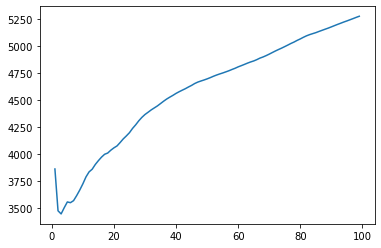

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
X = pd.DataFrame(data_copy)
y = car_data["price"]
score = []
alphas = []#损失
for alpha in range(1,100,1):
    alphas.append(alpha)
    rdg = KNeighborsRegressor(alpha)
    sc = np.sqrt( -cross_val_score(rdg,X,y,scoring = "neg_mean_squared_error", cv = 5,n_jobs=-1))#scoring=负均方误差
    score.append(sc.mean())
plt.plot(alphas,score)
plt.show()

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least 

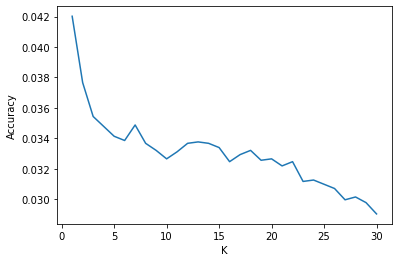

0.37012987012987014


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
k_range = range(1,31)
cv_scores = []#用来放每个模型的结果值
X = pd.DataFrame(data_copy)
y = car_data["price"]
for n in k_range:
    knn = KNeighborsClassifier(n)#knn模型
    scores1 = cross_val_score(knn,X,y,cv=10,scoring='accuracy',n_jobs=-1)#scoring=精确
    cv_scores.append(scores1.mean())
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy') #通过图像选择最好的参数
plt.show()
best_knn = KNeighborsClassifier(n_neighbors=3) # 选择综合最佳的K=3传入模型
best_knn.fit(X,y) #训练模型
print(best_knn.score(X,y))#得出结果
#报错为总数据量无法被10整除

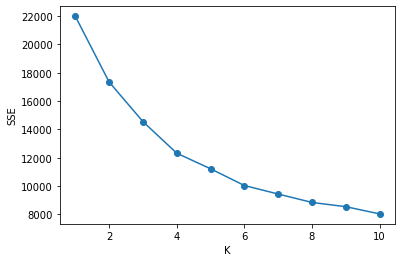

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
SSE = []#簇内误方差
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_copy)
    #计算KMeans算法SSE
    SSE.append(kmeans.inertia_)
x = range(1, 11)
plt.plot(x, SSE, marker="o")
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3)#n_clusters值越大，种类越多
kmeans.fit(data_copy) 
# 把训练器应用在训练集上
predict_y = kmeans.predict(data_copy)
result = pd.concat((car_data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
result.to_csv("car_data_result.csv", index= False)
result

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,聚类结果
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,2
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,2
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,2
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,2
...,...,...,...,...,...,...,...,...,...,...
10775,X4,2015,20000,Automatic,44147,Diesel,200,47.9,3.0,2
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,2
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,2
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,0


In [25]:
min_price =15000
max_price=17500
min_year=2015
max_year=2017
print('价格:' , min_price , '~' , max_price)
print('年份:' , min_year , '~' , max_year)
print('适合的车有:')
print('   车型   ','年份 ','价格',' 变速器   ','里程','燃油类型','  税 ','油耗','发动机尺寸')
ii=0
for model in result.iterrows():#按行遍历
    if (min_price <= result.at[ii,'price'] and result.at[ii,'price'] <= max_price and 
           min_year <= result.at[ii,'year'] and result.at[ii,'year'] <= max_year):
        i = result.at[ii,'聚类结果']
        ls=-1
        for model in result.iterrows():
            ls+=1
            if(result.at[ls,'聚类结果'] == i and min_price <= result.at[ls,'price'] and 
               result.at[ls,'price'] <= max_price and min_year <= result.at[ls,'year'] and
               result.at[ls,'year'] <= max_year):
                print('%-10s'%result.at[ls,'model'],result.at[ls,'year'],'%5s'%result.at[ls,'price'],
                      '%-9s'%result.at[ls,'transmission'],'%6s'%result.at[ls,'mileage'],'%-8s'%result.at[ls,'fuelType'],
                      '%5s'%result.at[ls,'mpg'],'%3s'%result.at[ls,'tax'],'   ',result.at[ls,'engineSize'])
        break
    ii+=1

价格: 15000 ~ 17500
年份: 2015 ~ 2017
适合的车有:
   车型    年份  价格  变速器    里程 燃油类型   税  油耗 发动机尺寸
 5 Series  2016 16000 Automatic  62794 Diesel    51.4 160     3.0
 5 Series  2017 16000 Automatic  38538 Diesel    60.1 125     2.0
 X3        2017 15500 Manual     74907 Diesel    52.3 145     2.0
 X3        2016 15500 Automatic  77823 Diesel    54.3 125     2.0
 3 Series  2017 16500 Manual     16570 Diesel    58.9 125     2.0
 3 Series  2017 16000 Automatic  45456 Diesel    64.2  30     2.0
 1 Series  2017 15500 Automatic  22812 Diesel    68.9  20     1.5
 3 Series  2016 15100 Automatic  29213 Diesel    64.2  30     2.0
 X3        2015 17400 Automatic  50316 Diesel    47.9 200     3.0
 4 Series  2017 16800 Automatic  44011 Diesel    65.7 150     2.0
 i3        2016 17100 Automatic  25269 Other    470.8   0     0.6
 X1        2016 16700 Automatic  44478 Diesel    60.1 125     2.0
 4 Series  2016 15500 Automatic  45856 Diesel    65.7  30     2.0
 5 Series  2016 15600 Automatic  35474 Diesel    60.1 1

 3 Series  2017 16840 Automatic  47439 Diesel    56.5 145     3.0
 1 Series  2017 15000 Manual     39838 Diesel    62.8 145     2.0
 X1        2017 16333 Manual     24050 Diesel    58.9 125     2.0
 2 Series  2017 15261 Manual     14143 Diesel    74.3 150     1.5
 3 Series  2017 15295 Manual     41208 Diesel    67.3  30     2.0
 i3        2016 15990 Automatic  68000 Hybrid   470.8   0     0.0
 2 Series  2017 16990 Manual     13566 Diesel    64.2  30     2.0
 2 Series  2015 15995 Manual     19361 Diesel    64.2  30     2.0
 1 Series  2017 15875 Manual     16000 Diesel    68.9 150     2.0
 1 Series  2017 16185 Automatic  37834 Diesel    67.3 145     2.0
 2 Series  2016 15062 Manual     19657 Diesel    68.9  20     1.5
 3 Series  2017 17285 Manual     30761 Diesel    58.9 125     2.0
 5 Series  2016 15995 Automatic  23500 Diesel    68.9  20     2.0
 X1        2016 16690 Automatic  32333 Diesel    55.4 145     2.0
 3 Series  2016 15995 Automatic  43000 Diesel    60.1 125     2.0
 5 Series 

 X3        2016 15795 Automatic  73850 Diesel    47.9 200     3.0
 X1        2016 16799 Automatic  50296 Diesel    55.4 145     2.0
 3 Series  2017 15000 Automatic  85070 Hybrid   134.5 135     2.0
 X5        2015 17500 Automatic 116130 Diesel    47.9 200     3.0
 4 Series  2017 16000 Automatic  50390 Diesel    65.7 145     2.0
 4 Series  2016 16299 Automatic  52070 Diesel    65.7  30     2.0
 2 Series  2017 15699 Automatic  45061 Hybrid   141.2 135     1.5
 4 Series  2016 16099 Manual     37683 Diesel    62.8  30     2.0
 2 Series  2016 16359 Automatic  17748 Diesel    57.6 125     2.0
 5 Series  2016 15850 Automatic  33740 Diesel    65.7  30     2.0
 3 Series  2016 16199 Automatic  45223 Hybrid   134.5   0     2.0
 3 Series  2016 16099 Automatic  40217 Hybrid   148.7   0     2.0
 2 Series  2017 15099 Manual     16309 Diesel    65.7 145     2.0
 X1        2017 15999 Automatic  60703 Diesel    65.7 145     2.0
 4 Series  2017 17499 Automatic  33711 Diesel    65.7 145     2.0
 3 Series 